# SI618 Lab 8

### Total score is 100 points

  **Make sure you show your code and explain your answers for each question**

## Overview

This lab consists of an exploration of a well-known UCI data set about wine quality.  The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Wine Dataset

We get you started by loading some libraries as well as the wine quality dataset:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. [5 points] What is the median of 'quality'?


In [3]:
np.median(wine["quality"])

6.0

### Q2. [20 points] What is the mean, median and 95% percentile range [2.5%, 97.5%] of all variables except quality? Please use a markdown cell

In [4]:
def get_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    prange_95 = (np.percentile(data, 2.5), np.percentile(data, 97.5))
    return [mean, median, prange_95]

statistic = []
colname = list(wine.columns)
colname.remove("quality")

for c in colname:
    if c != "quality":
        statistic.append(get_statistics(wine[c]))

statistic_df = pd.DataFrame(statistic, 
                            columns=["mean", "median", "95% percentile range"],
                            index = colname)
statistic_df

,mean,median,95% percentile range
fixed acidity,8.319637,7.90000,"(5.6, 12.5)"
volatile acidity,0.527821,0.52000,"(0.24, 0.915)"
citric acid,0.270976,0.26000,"(0.0, 0.66)"
residual sugar,2.538806,2.20000,"(1.4, 6.3)"
chlorides,0.087467,0.07900,"(0.048, 0.205)"
free sulfur dioxide,15.874922,14.00000,"(3.0, 40.52499999999998)"
total sulfur dioxide,46.467792,38.00000,"(10.0, 131.0)"
density,0.996747,0.99675,"(0.992939, 1.0004)"
pH,3.311113,3.31000,"(3.0195000000000003, 3.610499999999999)"
sulphates,0.658149,0.62000,"(0.44, 1.08)"


### Q3a. [5 points] Create a column based on quality called 'good_wine'. If the quality is greater or equal to the median, it returns 'yes', otherwise it returns 'no' (Hint: you can use the pd.cut function we learnt earlier. Try to avoid using for loops)

In [5]:
wine["good_wine"] = pd.cut(wine["quality"], bins=2, labels=["no", "yes"])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,yes
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no


### Q3b. [10 points] Create a column based on residual sugar called 'sweetness'. Assign the labels "low" to the first quartile, "moderate" to the second and third quartiles, and "high" to the fourth. (Hint: Consider using the pd.qcut function)

In [6]:
wine["sweetness"] = pd.qcut(wine["residual sugar"], 
                            q=[0, 0.25, 0.75, 1], 
                            labels=["low", "moderate", "high"])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine,sweetness
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no,moderate
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no,moderate
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,yes,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no,low


### Q4. [20 points] Create violin plot  that shows the ph levels (y-axis) for wines with different quality (x-axis), separated according to this new "sweetness" column.  What can you say about the interaction of acidity (i.e. pH. lower pH means more acidic) and sweetness as the quality of the wine varies? (You can adjust figure size if details aren't clear).

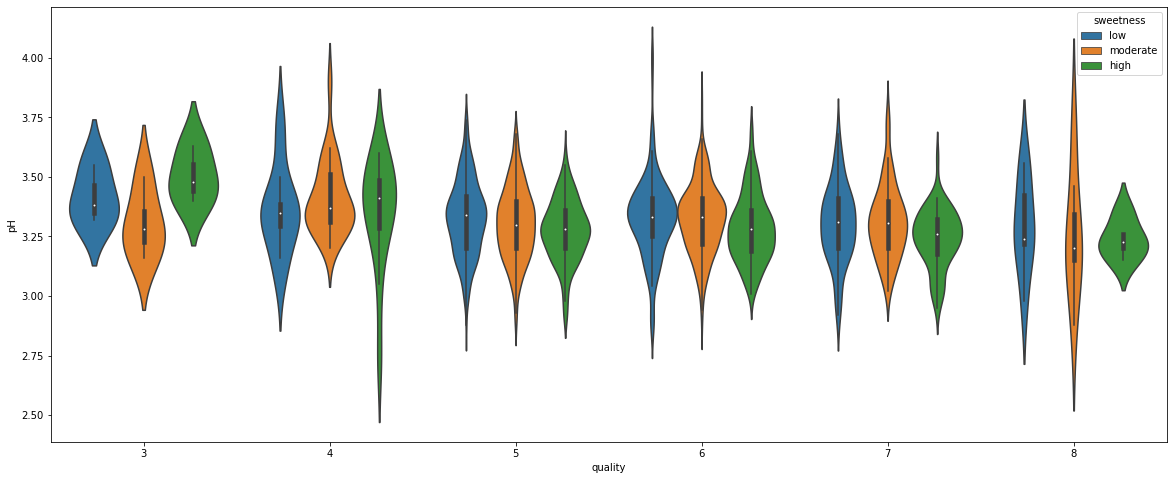

In [7]:
plt.figure(figsize=(20,8))
ax = sns.violinplot(x="quality", y="pH", hue="sweetness", data=wine)

The higher quality a wine has, the lower pH (more acidic) it will be.

But there is not enough evidence to figure out a clear relationship between the quality and the sweetness.

### Q4. [15 points] Make a pairplot that uses color to differentiate good and bad wine using the good_wine for the following:
- fixed acidity
- volatile acidity
- citric acid 
- residual sugar
- free sulfur dioxide 
- pH 
- alcohol

### Answer the following two questions:
1. Which variable distribution is most different across good and bad wines?
2. List at least one pair of positively correlated and one pair of negatively correlated variables

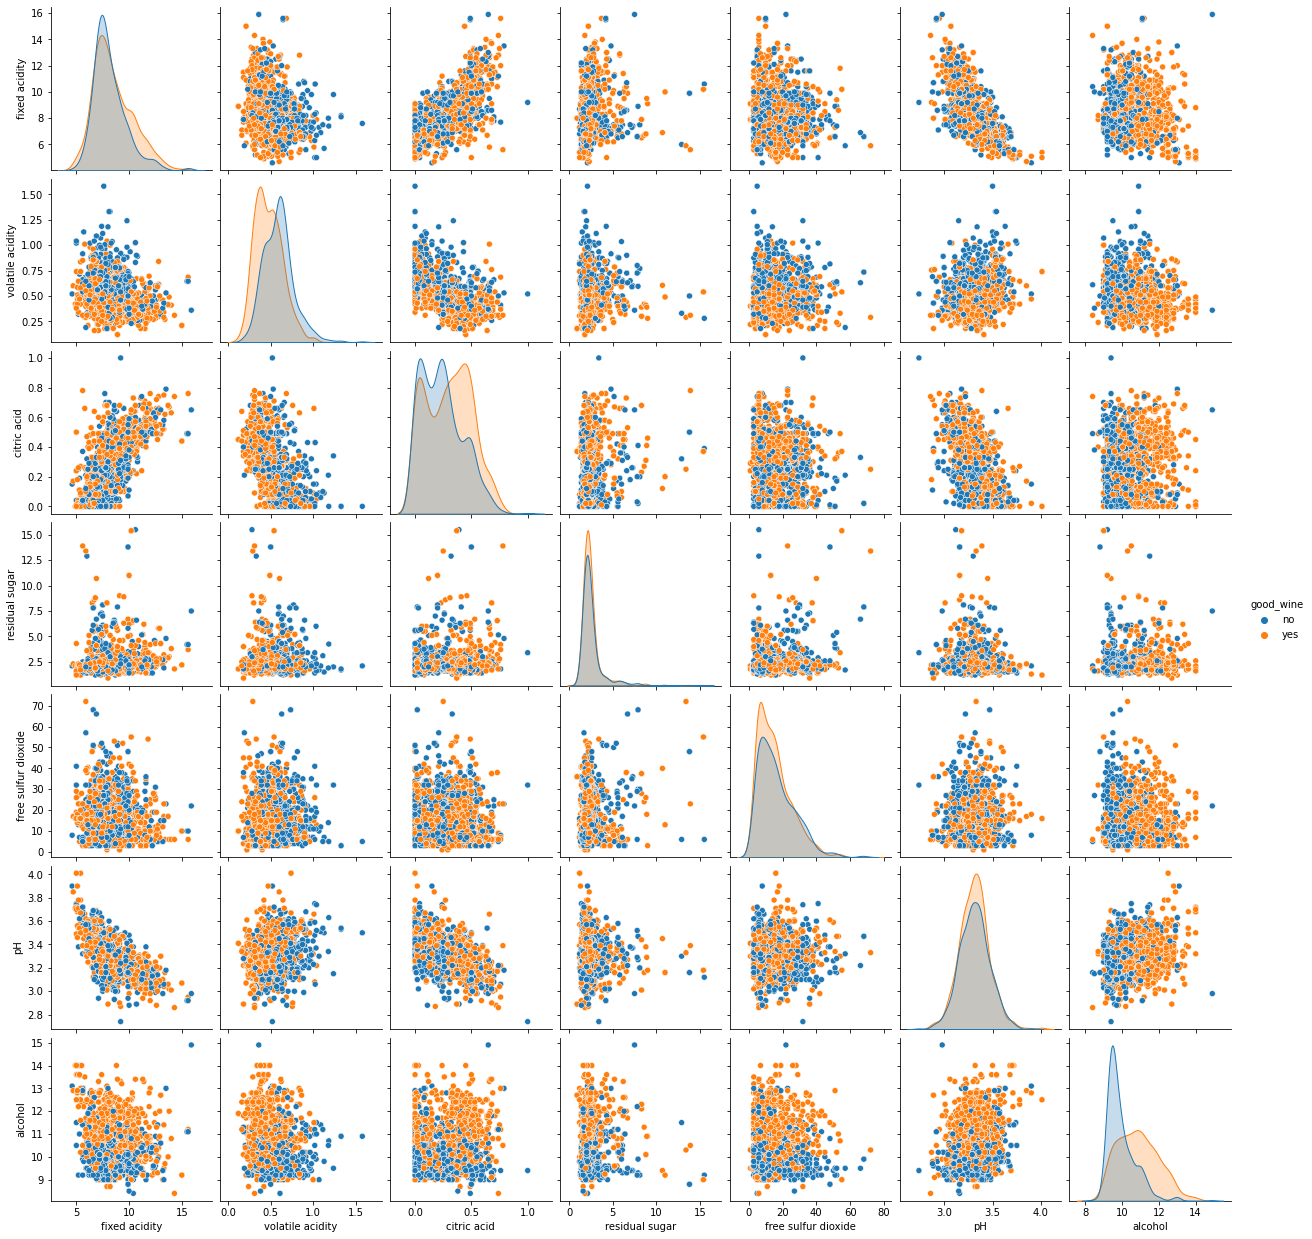

In [8]:
wine_part = wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                  "free sulfur dioxide", "pH", "alcohol", "good_wine"]]
sns.pairplot(wine_part, hue="good_wine")

1. The distribution of variable `alcohol` is most different across good and bad wines.

2. + positively correlated pair(s): `citric acid` and `fixed acidity`
   + negatively correlated pair(s): `pH` and `fixed acidity`, `citric acid` and `volatile acidity`

### Q5. [10 points] Create a mosaic plot to observe the relationship between **sweetness** and **good_wine**. Does it seem like good wines more likely to be associated with a characteristic level of sweetness? 

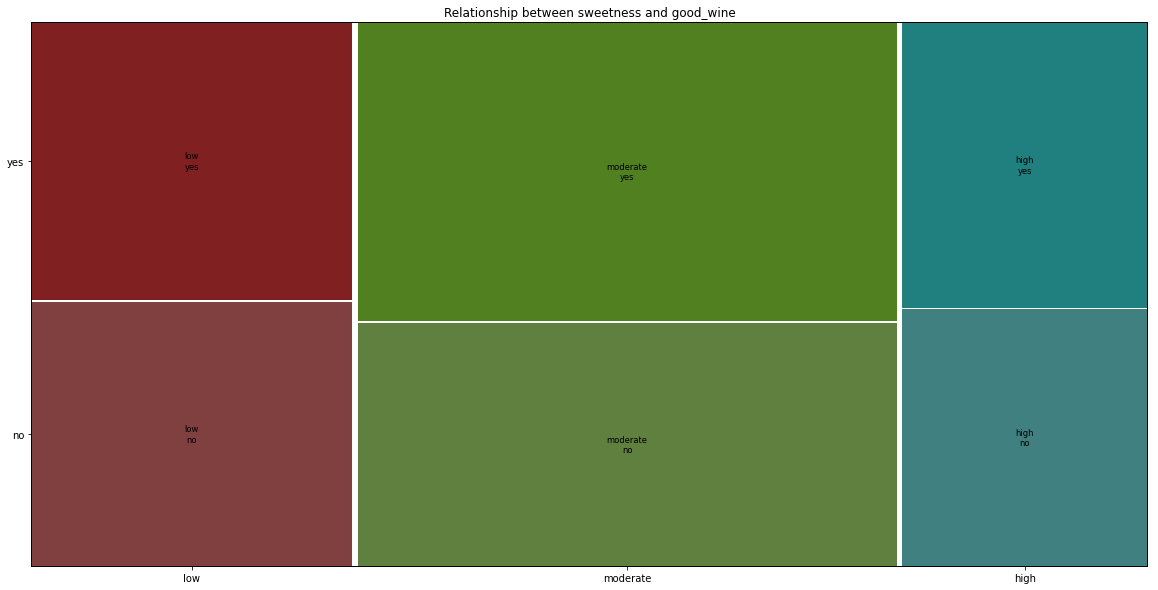

In [9]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(wine, 
           ['sweetness','good_wine'], 
           title='Relationship between sweetness and good_wine')
t[0].set_size_inches(20,10)

According to the mosaic plot, good wines do not show any explicit association or connection with a characteristic level of sweetness.

### Q6. [10 points] Starting with a cross tabulation of the actual data, create a table that shows the number of wines by quality (good or not) that would be associated with different levels of sweetness if sweetness was not related to quality

In [10]:
ct = pd.crosstab(wine["good_wine"], wine["sweetness"])
ct

sweetness,low,moderate,high
good_wine,,,
no,226,350,168
yes,238,430,187


In [17]:
# revision
ct = pd.crosstab(wine.sweetness,wine.good_wine,margins=True)
expectedGood = np.round(ct.All*ct.loc["All","yes"]/ct.loc["All", "All"], decimals=3) 
expectedBad = np.round(ct.All*ct.loc["All","no"]/ct.loc["All", "All"], decimals=3) 

ctExpected = ct.copy()
ctExpected.yes = expectedGood
ctExpected.no = expectedBad
ctExpected['All'] = 0
ctExpected.loc['All'] = 0
ctExpected['All'] = ctExpected.sum(axis=1)
ctExpected.loc['All'] = ctExpected.sum(axis=0)
ctExpected

good_wine,no,yes,All
sweetness,,,
low,215.895,248.105,464.0
moderate,362.927,417.073,780.0
high,165.178,189.822,355.0
All,744.000,855.000,1599.0


### Q7. [5 points] Is the relationship you observe between sweetness and quality based on Q5 and Q6 statistically significant? ($\alpha = 0.05$) 

In [66]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  1.8357800035942151
p-val =  0.3993608032910923
degree of freedom =  2
Expected:


,0,1,2
0,215.894934,362.926829,165.178236
1,248.105066,417.073171,189.821764


Since we have a p-value > $\alpha$, we can not reject the null hypothesis, indicating that there is no enough evidence to conclude that there are some relationship between `sweetness` and `quality`.

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both si618_lab8_uniqname.ipynb and si618_lab8_uniqname.html SEPARATELY on canvas</font>